# Image Class Project 2


## Introduction

Object tracking is a crucial task in computer vision with applications in various fields such as surveillance, traffic monitoring, human-computer interaction, and sports analytics. The ability to detect and follow an object’s movement across frames in a video stream is fundamental in many real-world applications, including security systems, autonomous vehicles, and augmented reality. Tracking a moving object, such as a person walking, allows for the extraction of motion patterns, identification of behavioral trends, and enhancement of situational awareness in different environments. 

The importance of visual tracking has grown significantly with the advancement of artificial intelligence and machine learning. Automated surveillance systems, for example, rely on object tracking to monitor and analyze human activity in real time, helping improve public safety. 

Similarly, in traffic management, tracking vehicles can help optimize road usage and prevent accidents. Sports analytics also benefit from tracking technologies to analyze player movements and improve team performance.
This project aims to implement a visual tracking algorithm in Python to track the movement of a person using the Meanshift algorithm. Meanshift is a well-established technique in computer vision that allows for robust tracking based on color histograms, making it an effective tool in environments where object shape and size may vary.

 The step-by-step implementation will be documented in a Jupyter Notebook, providing a structured approach to understanding and applying the algorithm in real-world scenarios. Through this implementation, the project seeks to demonstrate the practical applications of Meanshift and its capability in handling object tracking tasks effectively.


## Choise of traking algorithm

The Meanshift algorithm was chosen for this project due to its efficiency, adaptability, and robustness in object tracking. Unlike other tracking methods that require complex mathematical modeling or deep learning frameworks, Meanshift is a non-parametric iterative algorithm that does not depend on prior knowledge of object shape, size, or motion dynamics. 

Instead, it focuses on identifying and following areas with high pixel density, making it a computationally efficient choice for real-time applications. Meanshift works by iteratively shifting a search window toward the region of highest color density in an image, which makes it particularly useful for tracking objects with distinct color features. 
This property is advantageous in scenarios where objects may change in shape or orientation but retain a consistent color distribution. Additionally, since the algorithm does not rely on training data, it provides a flexible solution for tracking objects without requiring large datasets or extensive model training.

The use of Meanshift in this project aligns with its established role in computer vision applications such as human tracking, vehicle tracking, and gesture recognition. Its ability to adapt to dynamic environments while maintaining efficiency makes it a suitable choice for real-world implementations. Moreover, the integration of OpenCV facilitates seamless execution of the algorithm, leveraging powerful built-in functions to enhance tracking accuracy and performance. 

By implementing Meanshift, this project aims to highlight its practicality in object tracking while also addressing some of its limitations, such as sensitivity to abrupt changes in lighting or occlusions. 
Potential enhancements, including the use of Camshift (Continuously Adaptive Meanshift) for adaptive window sizing, could be explored to improve tracking stability. Ultimately, this project serves as a foundational step in understanding and applying Meanshift in real-world tracking applications, demonstrating its effectiveness and ease of use in Python.


In [ ]:
import cv2
import cvzone
from cvzone.ColorModule import ColorFinder

# Create the color Finder object
# True : debug mode
myColorFinder = ColorFinder(False)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)]
prediction = False

cap = cv2.VideoCapture("Bouncing ball.mp4")

while True:
    # Grab the image
    success, img = cap.read()
    # Display
    # img = cv2.imread("ball.png")
    # cv2.imshow('img',img)
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    imgContours, contours = cvzone.findContours(img,mask, minArea=200)

    imgColor = cv2.resize(imgColor, (0, 0), None, 0.4, 0.4)
    
    # cv2.imshow("Image with Color", imgColor)
    cv2.imshow("Video ball", imgContours)
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [ ]:
import cv2
import cvzone
from cvzone.ColorModule import ColorFinder

# Create the color Finder object
# True : debug mode
myColorFinder = ColorFinder(False)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)]
prediction = False

cap = cv2.VideoCapture("Bouncing ball.mp4")

while True:
    # Grab the image
    success, img = cap.read()
    # Display
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    imgContours, contours = cvzone.findContours(img,mask, minArea=200)

    if contours:
        cx, cy = contours[0]['center']
        print(cx, cy)
        cv2.circle(imgContours, (cx,cy), 5, (0, 255, 0), cv2.FILLED)
    imgColor = cv2.resize(imgContours, (0, 0), None, 0.4, 0.4)
    
    # cv2.imshow("Image with Color", imgColor)
    cv2.imshow("Video ball", imgContours)
    cv2.waitKey(50)
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [ ]:
import math
import cv2
import cvzone
from cvzone.ColorModule import ColorFinder
import numpy as np

# Initialize the Video
cap = cv2.VideoCapture('Bouncing ball.mp4')

# Create the color Finder object
myColorFinder = ColorFinder(False)
hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

# Variables
posListX, posListY = [], []
xList = [item for item in range(0, 1300)] # image shpae of x -> 1300x1080
prediction = False

while True:
    
    success, img = cap.read()
    # img = img[0:900, :]
    
    # Display
    img = cv2.resize(img, (0, 0), None, 0.7, 0.7)
    
    # Process the image using the ColorFinder update method
    imgColor, mask = myColorFinder.update(img, hsvVals)
    
    imgContours, contours = cvzone.findContours(img, mask, minArea=500)
    
    if contours:
        posListX.append(contours[0]['center'][0])
        posListY.append(contours[0]['center'][1])
        
    if posListX and posListY: 
        # polunomial regression y = Ax ^ 2 + Bx + C
        A, B, C = np.polyfit(posListX, posListY, 2)
        
        
        for i, (posX, posY) in enumerate(zip(posListX, posListY)):
            pos = (posX, posY)
            cv2.circle(imgContours, pos, 5, (0, 255, 0), cv2.FILLED)
            if i >= 1:
                cv2.line(imgContours, pos, (posListX[i - 1], posListY[i - 1]), (0, 255, 0), 2)
        
        for x in xList:
            y = int(A * x**2 + B * x + C)
            cv2.circle(imgContours, (x, y), 2, (255, 0, 255), cv2.FILLED)
            
        print(posListX)
        if len(posListX) < 10 :
            # Prediction
            a = A
            b = B
            c = C - 590

            x = int((-b - math.sqrt(b ** 2 - (4 * a * c))) / (2 * a))
            # print(x)
            prediction = 100 < x < 150

        if prediction:
            cvzone.putTextRect(imgContours, "Basket", (50, 100),
                               scale=3, thickness=3, colorR=(0, 200, 0), offset=20)
        else:
            cvzone.putTextRect(imgContours, "No Basket", (50, 100),
                               scale=3, thickness=3, colorR=(0, 0, 200), offset=20)
            
    cv2.imshow("Image with countours", imgContours)
    
    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(85) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()

## Step by step

Import libraries

In [46]:
import numpy as np
import cv2 as cv

Read the input video and get resolution

In [47]:

cap = cv.VideoCapture('Bouncing ball.mp4') 
  

In [48]:
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

print(f"Video Resolution: {frame_width}x{frame_height}")

Video Resolution: 1280x720


In [49]:
# take first frame of the video 
ret, frame = cap.read() 

Select Region of interest

In [51]:
# Manually select ROI
roi = cv.selectROI("Select Tracking Region", frame, fromCenter=False, showCrosshair=True)
cv.destroyAllWindows()

In [52]:
roi

(500, 0, 374, 112)

Get window size

In [53]:
x, y, width, height = roi
track_window = (x, y, width, height) 

In [54]:
# set up the Region of interest for tracking
roi = frame[y:y + height, x : x + width]

In [55]:
roi.shape

(112, 374, 3)

Visualize window

In [56]:
import matplotlib.pyplot as plt
def plot_array(fillter):
    plt.imshow(cv.cvtColor(fillter, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Region of interest

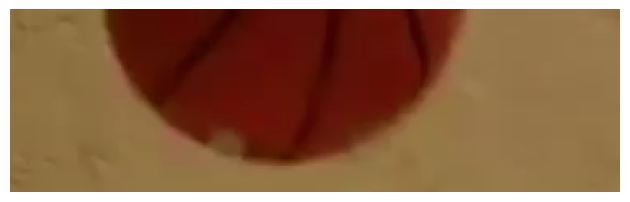

In [57]:
plot_array(roi)

HSV window

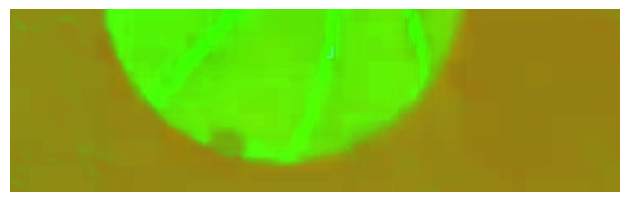

In [58]:
# convert ROI from BGR to HSV format 
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV) 
plot_array(hsv_roi)  

Mask window

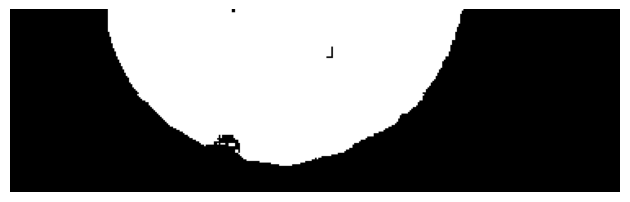

In [59]:
# perform masking operation 
# hsvVals = {'hmin': 0, 'smin': 176, 'vmin': 51, 'hmax': 16, 'smax': 255, 'vmax': 255}

mask = cv.inRange(hsv_roi, np.array((0., 176., 51.)), np.array((16., 255., 255))) 
plot_array(mask)  

In [60]:
roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180]) 
cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX);

In [61]:
# Termination criteria for camshift
# 15 iterations or window moves less than 2 pixels
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 15, 2)

In [ ]:

while(1):
    ret, frame = cap.read() 
      
    # Resize the video frames. 
    # frame = cv.resize(frame,  (720, 720), fx = 0, fy = 0, interpolation = cv.INTER_CUBIC) 
  
    # thresholding
    ret1, frame1 = cv.threshold(frame, 180, 155, cv.THRESH_TOZERO_INV) 
  
    # convert from BGR to HSV 
    hsv = cv.cvtColor(frame1, cv.COLOR_BGR2HSV)
    
    # Back projection
    dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
    
    # Apply Camshift 
    ret2, track_window = cv.CamShift(dst, track_window, term_crit) 

    # Draw it on image 
    pts = cv.boxPoints(ret2)
    pts = np.int0(pts)
    Result = cv.polylines(frame, [pts], True, (0, 255, 255), 2) 
    

    # out of frame handeling
    x, y, w, h = track_window
    initial_area = w * h  # 30,475
    mythreshold = initial_area * 0.15 
    # if w * h < mythreshold:
        # print("Small treshhold")
    mask = cv.inRange(hsv, np.array([0, 176, 51]), np.array([16, 255, 255]))
    
    # Find contours of the detected area
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    if contours:
        # Pick the largest detected contour (assumed to be the ball)
        largest_contour = max(contours, key=cv.contourArea)
        x, y, w, h = cv.boundingRect(largest_contour)
        track_window = (x, y, w, h)
    cv.imshow('Camshift', Result)
  
    # set ESC key as the exit button. 
    k = cv.waitKey(30) & 0xff
      
    if k == 27:
        break
  
# Release the cap object 
cap.release() 
  
# close all opened windows 
cv.destroyAllWindows() 

C:\Users\alexc\AppData\Local\Temp\ipykernel_36328\1716342860.py:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  pts = np.int0(pts)


## Challenges